# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## A. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [ ]:
# put your answer here
df = pd.read_excel("personality.xlsx")

print(df.head())


print(df.tail())

      Name  Post/Share Frequently?  Active in social media?  \
0    Gidz                        1                        0   
1  Aldrin                        1                        0   
2  Clarke                        1                        1   
3  Ashley                        1                        0   
4    Alex                        1                        1   

   Replies to comments?  Number of friends/followers  Personality  
0                     0                          574            1  
1                     0                          105            0  
2                     1                          485            0  
3                     0                          629            1  
4                     1                          330            1  
         Name  Post/Share Frequently?  Active in social media?  \
45    Alexis                        1                        0   
46      Alex                        1                        0   
47   Maynard   

1. Display the summary of all the features of the dataset using `.info()`

In [ ]:
# put your answer here
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB
None


2. Display the total number of samples from each label using `.value_counts()`

In [ ]:
# put your answer here
print(df['Personality'].value_counts())


Personality
0    27
1    23
Name: count, dtype: int64


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
# put your answer here
X = df.drop(columns=['Name', 'Personality']).values

print(X.shape)
print(X.ndim)

(50, 4)
2


4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
# put your answer here
y = df['Personality'].values
print(y.shape)
print(y.ndim)

(50,)
1


5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
# put your answer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 4)
(5, 4)
(45,)
(5,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(n_neighbors=1)


7. Train the model using the `.fit()`

In [ ]:
# put your answer here
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=1)

8. Test the model using the `.predict()`

In [ ]:
# put your answer here
y_pred = knn.predict(X_test)
print(y_pred)

[1 0 0 0 1]


## Evaluate the model

9. Create a confusion matrix

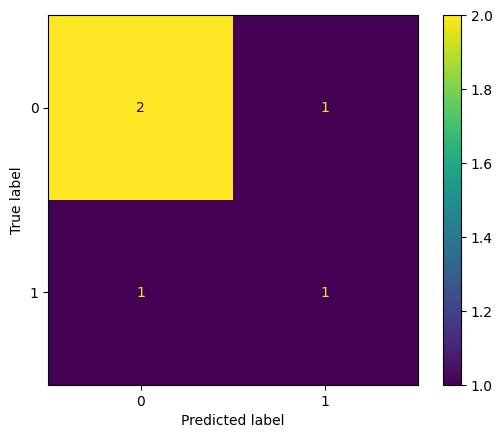

In [ ]:
# put your answer here

conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [ ]:
# put your answer here
metrics.accuracy_score(y_test, y_pred)




0.6

11. Display the precision

In [ ]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.66666667 0.5       ]


12. Display the recall

In [ ]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)



Recall: [0.66666667 0.5       ]


13. Display the f1-score

In [ ]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)


f1-score: [0.66666667 0.5       ]


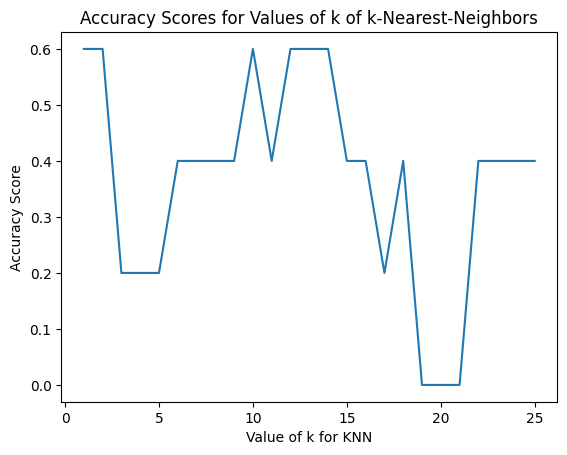

In [ ]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[0, 1, 0, 900]])

array([0])